In [1]:
#Setup
from fastai import *          # Quick accesss to most common functionality
from fastai.tabular import *  # Quick accesss to tabular functionality     # Access to example data provided with fastai
from fastai.vision import *
data_dir = '../../userdata/data/'
sys.path.append("../code") # go to parent dir
from commuter import *
dep_var = 'journey'
#cat_names = ["detectedActivity","weekday"]

procs = [FillMissing, Categorify, Normalize]
# Uncomment active user'
userId = "tnK534JMwwfhvUEycn69HPbhqkt2" #Maria
#user = "ehaBtfOPDNZjzy1MEvjQmGo4Zv12" #Andrea
#user = "hCWCulj7M1aMVyd0Fm0Eqrv8q1Q2" #Bjorn
personas = pd.read_csv("../data/personas.csv")
personaname = personas.loc[personas['id']==userId]['name'].iloc[0]
data_dir = 'saved/'
model_dir = 'saved/models/'
teachingSetName="_teach.csv"

epoch,train_loss,valid_loss,accuracy
1,1.273843,1.353359,0.607143
2,1.014602,1.150416,0.607143
3,0.803814,0.691769,1.000000
4,0.616752,0.309378,1.000000
5,0.460028,0.127006,1.000000
6,0.339985,0.084190,1.000000
7,0.255004,0.035042,1.000000
8,0.189830,0.028414,1.000000
9,0.141928,0.015345,1.000000
10,0.106868,0.011061,1.000000


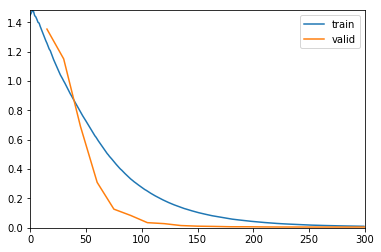

CPU times: user 12.5 s, sys: 11.7 s, total: 24.2 s
Wall time: 27 s


In [22]:
cont_names =["geoHash"]
usecols=['geoHash','journey']
dep_var = 'journey'
teachingSet = pd.read_csv(data_dir+userId+teachingSetName,usecols=usecols)
teachingSet= make_shure_we_got_enough_rows(teachingSet)
valid_idx = list(np.random.randint(0,len(teachingSet),int(len(teachingSet)*0.1)))
data = (TabularList.from_df(teachingSet, path=model_dir+userId, cont_names=cont_names, procs=procs)
    .split_by_idx(valid_idx)
    .label_from_df(cols=dep_var)
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy
1,1.046494,1.246783,1.000000
2,0.738508,0.649854,1.000000
3,0.515505,0.168140,1.000000
4,0.365695,0.059184,1.000000
5,0.259790,0.030564,1.000000
6,0.187361,0.017876,1.000000
7,0.136759,0.013134,1.000000
8,0.101269,0.009425,1.000000
9,0.075606,0.007374,1.000000
10,0.056949,0.005960,1.000000


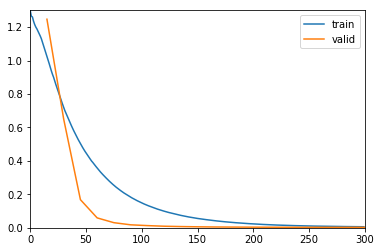

CPU times: user 12.7 s, sys: 11.7 s, total: 24.3 s
Wall time: 27.1 s


In [23]:
cont_names =['longitude','latitude']
usecols=['longitude','latitude','journey']
dep_var = 'journey'
teachingSet = pd.read_csv(data_dir+userId+teachingSetName,usecols=usecols)
teachingSet= make_shure_we_got_enough_rows(teachingSet)
valid_idx = list(np.random.randint(0,len(teachingSet),int(len(teachingSet)*0.1)))
data = (TabularList.from_df(teachingSet, path=model_dir+userId, cont_names=cont_names, procs=procs)
    .split_by_idx(valid_idx)
    .label_from_df(cols=dep_var)
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy
1,1.314000,1.362055,0.276786
2,0.930457,1.027918,1.000000
3,0.638918,0.359343,1.000000
4,0.444187,0.100712,1.000000
5,0.312966,0.040290,1.000000
6,0.225070,0.022356,1.000000
7,0.163990,0.015579,1.000000
8,0.121187,0.011323,1.000000
9,0.090491,0.008876,1.000000
10,0.067949,0.007176,1.000000


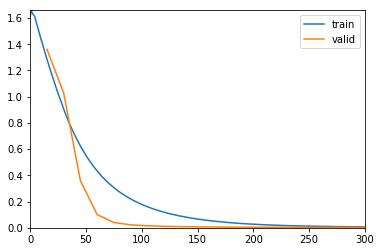

CPU times: user 12.4 s, sys: 11.6 s, total: 24 s
Wall time: 26.7 s


In [3]:
cont_names =['longitude','latitude','time','minuteOfDay','detectedActivityConfidence','geoHash','locationAccuracy']
cat_names = ['detectedActivity','weekday','monthday']
usecols=['detectedActivity','longitude','latitude','geoHash','locationAccuracy','time','minuteOfDay','weekday','monthday','detectedActivityConfidence','journey']
dep_var = 'journey'
teachingSet = pd.read_csv(data_dir+userId+teachingSetName,usecols=usecols)
teachingSet= make_shure_we_got_enough_rows(teachingSet)
valid_idx = list(np.random.randint(0,len(teachingSet),int(len(teachingSet)*0.1)))
data = (TabularList.from_df(teachingSet, path=model_dir+userId, cont_names=cont_names, procs=procs)
    .split_by_idx(valid_idx)
    .label_from_df(cols=dep_var)
    .databunch())
learner=tabular_learner(data, layers=[200,100],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(20)

epoch,train_loss,valid_loss,accuracy
1,0.849922,1.339121,0.267857
2,0.486518,0.664224,1.000000
3,0.299980,0.064867,1.000000
4,0.196150,0.012532,1.000000
5,0.133746,0.006150,1.000000
6,0.093821,0.004284,1.000000
7,0.067267,0.003255,1.000000
8,0.048913,0.002518,1.000000
9,0.036017,0.002046,1.000000
10,0.026656,0.001693,1.000000


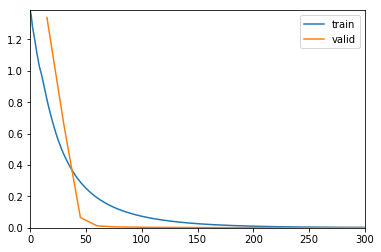

CPU times: user 16.1 s, sys: 14.4 s, total: 30.4 s
Wall time: 33.3 s


In [5]:
cont_names =['longitude','latitude','minuteOfDay','locationAccuracy']
cat_names = ['detectedActivity','weekday','monthday']
usecols=['detectedActivity','longitude','latitude','locationAccuracy','minuteOfDay','weekday','monthday','journey']
dep_var = 'journey'
teachingSet = pd.read_csv(data_dir+userId+teachingSetName,usecols=usecols)
teachingSet= make_shure_we_got_enough_rows(teachingSet)
valid_idx = list(np.random.randint(0,len(teachingSet),int(len(teachingSet)*0.1)))
data = (TabularList.from_df(teachingSet, path=model_dir+userId, cont_names=cont_names, procs=procs)
    .split_by_idx(valid_idx)
    .label_from_df(cols=dep_var)
    .databunch())
learner=tabular_learner(data, layers=[200,200],metrics=accuracy,callback_fns=ShowGraph)
#learner=tabular_learner(data, layers=[200,200,200],metrics=accuracy,callback_fns=ShowGraph)
%time learner.fit_one_cycle(20)